In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
# from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
X = df.drop(['mpg','origin','car name','model year','horsepower'], axis =1).values
y = df['mpg'].values.reshape(-1,1)

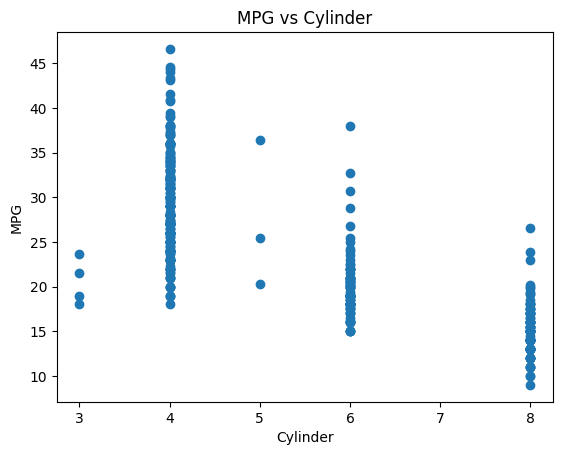

In [6]:
plt.title("MPG vs Cylinder")
plt.xlabel("Cylinder")
plt.ylabel("MPG")
plt.scatter(df['cylinders'], df['mpg'])
plt.show()

y_hat = b + w1x_1  + w2x_2 + w3x_3 + w4x_4 +w5x_5 

In [7]:
# Normalization of dataset
# Normalize features and target
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized, mean, std

def normalize_target(y):
    mean = np.mean(y)
    std = np.std(y)
    y_normalized = (y - mean) / std
    return y_normalized, mean, std

X_normalized, mean_X, std_X = normalize_features(X)
y_normalized, mean_y, std_y = normalize_target(y)

# Add bias term to the features
X_normalized_bias = np.c_[np.ones((len(X_normalized), 1)), X_normalized]

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X_normalized))
X_train = X_normalized_bias[:split_index]
y_train = y_normalized[:split_index]
X_test = X_normalized_bias[split_index:]
y_test = y_normalized[split_index:]

In [6]:
X_train



array([[ 1.        ,  1.49819126,  1.0906037 ,  0.63086987, -1.29549834],
       [ 1.        ,  1.49819126,  1.5035143 ,  0.85433297, -1.47703779],
       [ 1.        ,  1.49819126,  1.19623199,  0.55047045, -1.65857724],
       ...,
       [ 1.        , -0.85632057, -0.40739757,  0.03851532,  1.64544072],
       [ 1.        ,  0.32093534,  0.30319277,  0.48544151,  1.13713026],
       [ 1.        , -0.85632057, -0.92593647, -0.92509539,  0.08420146]])

In [7]:
y_train

array([[-0.7064387 ],
       [-1.09075062],
       [-0.7064387 ],
       [-0.96264665],
       [-0.83454267],
       [-1.09075062],
       [-1.2188546 ],
       [-1.2188546 ],
       [-1.2188546 ],
       [-1.09075062],
       [-1.09075062],
       [-1.2188546 ],
       [-1.09075062],
       [-1.2188546 ],
       [ 0.06218515],
       [-0.1940228 ],
       [-0.7064387 ],
       [-0.32212678],
       [ 0.44649707],
       [ 0.31839309],
       [ 0.19028912],
       [ 0.06218515],
       [ 0.19028912],
       [ 0.31839309],
       [-0.32212678],
       [-1.7312705 ],
       [-1.7312705 ],
       [-1.60316652],
       [-1.85937447],
       [ 0.44649707],
       [ 0.57460104],
       [ 0.19028912],
       [ 0.19028912],
       [-0.57833473],
       [-0.96264665],
       [-0.83454267],
       [-0.57833473],
       [-0.7064387 ],
       [-1.2188546 ],
       [-1.2188546 ],
       [-1.2188546 ],
       [-1.2188546 ],
       [-1.47506255],
       [-1.34695857],
       [-1.34695857],
       [-0

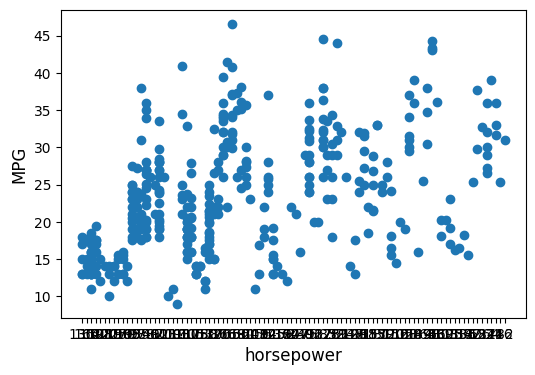

In [9]:
import matplotlib.pyplot as plt

# Assuming 'horsepower' is one of your features
feature_column = 'horsepower'
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df[feature_column], df['mpg'])  # Using the original data

# Set labels for axes
ax.set_ylabel('MPG', fontsize=12)
ax.set_xlabel(feature_column, fontsize=12)

plt.show()

In [10]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (318, 5), X Type:<class 'numpy.ndarray'>)
[[ 1.          1.49819126  1.0906037   0.63086987 -1.29549834]
 [ 1.          1.49819126  1.5035143   0.85433297 -1.47703779]
 [ 1.          1.49819126  1.19623199  0.55047045 -1.65857724]
 ...
 [ 1.         -0.85632057 -0.40739757  0.03851532  1.64544072]
 [ 1.          0.32093534  0.30319277  0.48544151  1.13713026]
 [ 1.         -0.85632057 -0.92593647 -0.92509539  0.08420146]]
y Shape: (318, 1), y Type:<class 'numpy.ndarray'>)
[[-0.7064387 ]
 [-1.09075062]
 [-0.7064387 ]
 [-0.96264665]
 [-0.83454267]
 [-1.09075062]
 [-1.2188546 ]
 [-1.2188546 ]
 [-1.2188546 ]
 [-1.09075062]
 [-1.09075062]
 [-1.2188546 ]
 [-1.09075062]
 [-1.2188546 ]
 [ 0.06218515]
 [-0.1940228 ]
 [-0.7064387 ]
 [-0.32212678]
 [ 0.44649707]
 [ 0.31839309]
 [ 0.19028912]
 [ 0.06218515]
 [ 0.19028912]
 [ 0.31839309]
 [-0.32212678]
 [-1.7312705 ]
 [-1.7312705 ]
 [-1.60316652]
 [-1.85937447]
 [ 0.44649707]
 [ 0.57460104]
 [ 0.19028912]
 [ 0.19028912]
 [-0.57833473]
 [-0

In [11]:
X.shape[0]

398

In [12]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [13]:


def compute_gradient(X, y, w, b): 
    
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [14]:


def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b)[0])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% np.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing


# In the next cell you will test the implementation. 

In [15]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618,26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (5,), b_init type: <class 'float'>


In [22]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.01
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_test, y_test, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
bt = b_final[0]
print(f"b,w found by gradient descent: {bt:0.2f},{w_final} ")

C:\Users\HP\AppData\Local\Temp\ipykernel_28584\4188460235.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


Iteration    0: Cost     0.83   
Iteration  100: Cost     0.17   
Iteration  200: Cost     0.16   
Iteration  300: Cost     0.15   
Iteration  400: Cost     0.15   
Iteration  500: Cost     0.14   
Iteration  600: Cost     0.14   
Iteration  700: Cost     0.14   
Iteration  800: Cost     0.14   
Iteration  900: Cost     0.13   
b,w found by gradient descent: 0.20,[ 0.19875144  0.06107513 -0.27069007 -0.80202826  0.22022824] 


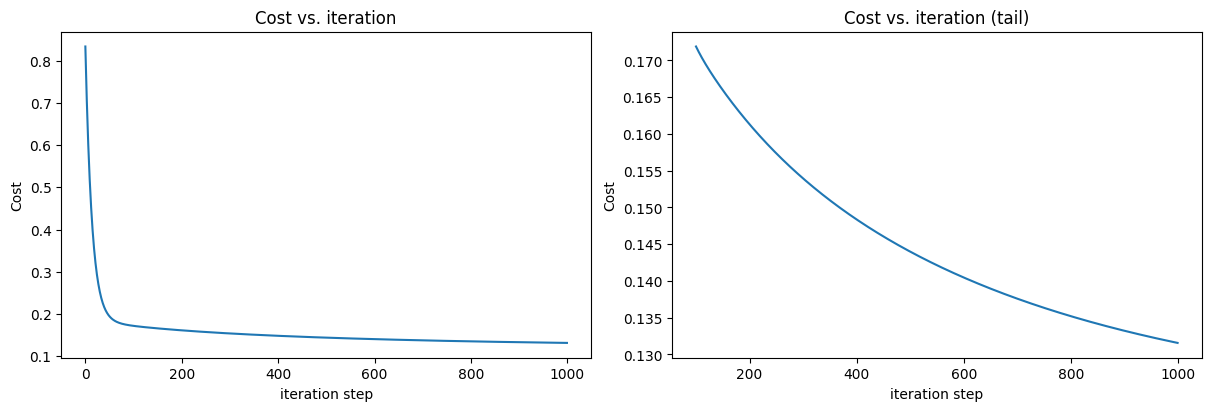

In [23]:
#  plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()


In [18]:
print(w_final)
print(X_train)
print(b_final)

[-0.08030505 -0.09547504 -0.19255745 -0.44960765 -0.01877527]
[[ 1.          1.49819126  1.0906037   0.63086987 -1.29549834]
 [ 1.          1.49819126  1.5035143   0.85433297 -1.47703779]
 [ 1.          1.49819126  1.19623199  0.55047045 -1.65857724]
 ...
 [ 1.         -0.85632057 -0.40739757  0.03851532  1.64544072]
 [ 1.          0.32093534  0.30319277  0.48544151  1.13713026]
 [ 1.         -0.85632057 -0.92593647 -0.92509539  0.08420146]]
[-0.08030505]


In [24]:
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final}, target value: {y_train[i]}")
     

prediction: [-0.59749129], target value: [-0.7064387]
prediction: [-0.92846592], target value: [-1.09075062]
prediction: [-0.64156144], target value: [-0.7064387]
prediction: [-0.5223659], target value: [-0.96264665]
prediction: [-0.65227997], target value: [-0.83454267]
prediction: [-1.86823394], target value: [-1.09075062]
prediction: [-2.02550475], target value: [-1.2188546]
prediction: [-1.98926688], target value: [-1.2188546]
prediction: [-2.01547127], target value: [-1.2188546]
prediction: [-1.42119841], target value: [-1.09075062]
prediction: [-1.01090828], target value: [-1.09075062]
prediction: [-1.10267852], target value: [-1.2188546]
prediction: [-1.28283503], target value: [-1.09075062]
prediction: [-0.74573286], target value: [-1.2188546]
prediction: [1.07630132], target value: [0.06218515]
prediction: [0.53008606], target value: [-0.1940228]
prediction: [0.58343488], target value: [-0.7064387]
prediction: [0.79814284], target value: [-0.32212678]
prediction: [1.30739256],

In [25]:
def calculate_accuracy(X, y, w, b):
    correct_predictions = 0
    total_predictions = len(X)
    
    for i in range(total_predictions):
        prediction = np.dot(X[i], w) + b
        if np.abs(prediction - y[i]) <= 0.5:  # Assuming a tolerance of 0.5 for correctness
            correct_predictions += 1
    
    accuracy = correct_predictions / total_predictions
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(X_test, y_test, w_final, b_final)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print predictions and target values
for i in range(0,len(X_train),20):
    prediction = np.dot(X_train[i], w_final) + b_final
    print(f"Prediction: {prediction}, Target value: {y_train[i]}")


Accuracy: 67.50%
Prediction: [-0.59749129], Target value: [-0.7064387]
Prediction: [0.99951776], Target value: [0.19028912]
Prediction: [-1.20829894], Target value: [-1.2188546]
Prediction: [1.33180283], Target value: [-0.45023075]
Prediction: [1.11105737], Target value: [-0.1940228]
Prediction: [0.29660615], Target value: [-0.7064387]
Prediction: [0.62514314], Target value: [-0.57833473]
Prediction: [-1.02388258], Target value: [-1.2188546]
Prediction: [-0.13435618], Target value: [-0.83454267]
Prediction: [0.65203259], Target value: [0.19028912]
Prediction: [0.13203185], Target value: [-0.7064387]
Prediction: [1.69792356], Target value: [1.2791729]
Prediction: [1.21851205], Target value: [0.89486098]
Prediction: [-0.03051424], Target value: [-0.62957632]
Prediction: [0.0456237], Target value: [-0.25807479]
Prediction: [0.41992611], Target value: [0.04937475]
